# ELEN 6885 Reinforcement Learning coding assignment

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />
<span style="color:red">(2 pts)</span>

In [2]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_f[step] = estimate(q_f[step-1], FixedStepSize, r)  # NewEstimate = OldEstimate + StepSize * (Target - OldEstimate)
    
    q_h[step] = estimate(q_h[step-1],1/step, r)
    
    # YOUR CODE ENDS HERE
    ############################
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimate (Please include a title, labels on both axes, and legends)<br />
<span style="color:red">(3 pts)</span>

<function matplotlib.pyplot.show>

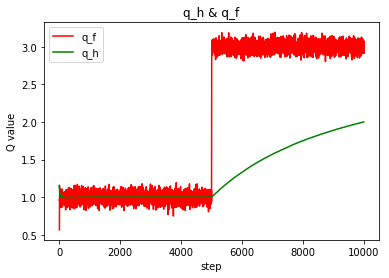

In [3]:
############################
# YOUR CODE STARTS HERE
x = np.arange(numTimeStep)
y1 = np.array(q_f)
y2 = np.array(q_h)
plt.plot(x, y1, 'r', label = 'q_f')
plt.plot(x, y2, 'g', label = 'q_h')
plt.title("q_h & q_f")
plt.xlabel('step')
plt.ylabel('Q value')
plt.legend()
plt.show
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py<br />
<span style="color:red">(5 pts)</span>

In [4]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q,0,6885) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, 0.1 ,6885) #Use epsilon = 0.1 and pass the parameter seed = 6885 to the function
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [5]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />
<span style="color:red">(5 pts)</span>

In [6]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book

### 3.2 Model-based RL algorithms

In [7]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm<br />
<span style="color:red">(15 pts)</span>

In [8]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations =', numIterations)
print('policy=',policy)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations = 7
policy= [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


In [9]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm<br />
<span style="color:red">(10 pts)</span>

In [10]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print("policy=",policy)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352937 0.82352936 0.82352935 0.82352935 0.82352938 0.
 0.52941174 0.         0.82352938 0.82352939 0.76470586 0.
 0.         0.88235293 0.94117646 0.        ]
policy= [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
Number of iterations to converge = 500


In [11]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm<br />
<span style="color:red">(10 pts)</span>

In [12]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[1.43452348e-03 2.72222769e-07 5.75504434e-04 9.06887601e-03]
 [1.59913676e-03 1.80072513e-03 1.59913676e-02 2.13837950e-03]
 [3.32318495e-02 3.73145948e-03 3.51286140e-03 3.87923169e-03]
 [8.55350055e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.24612035e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.20885157e-02 8.02000095e-03 1.64004537e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.60134572e-05 8.72619908e-04 6.73699828e-05 2.43910877e-02]
 [1.44480413e-01 0.00000000e+00 2.16689672e-02 8.08912156e-03]
 [2.30938627e-01 3.35468807e-03 3.20260701e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09775505e-03 3.57366721e-01 5.05543600e-02 1.93001490e-03]
 [6.35035315e-02 2.28100690e-02 8.12660007e-03 5.50463824e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [13]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [14]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 2000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.05348586 0.08894083 0.06708409 0.04168235]
 [0.02344606 0.03236604 0.02439455 0.0902641 ]
 [0.11915116 0.05809617 0.05089216 0.031892  ]
 [0.05018195 0.00125959 0.00283206 0.01101654]
 [0.11340085 0.04706459 0.02047752 0.03391938]
 [0.         0.         0.         0.        ]
 [0.18553917 0.04971762 0.06626115 0.01445863]
 [0.         0.         0.         0.        ]
 [0.03137216 0.13052527 0.04440841 0.04235066]
 [0.12459471 0.24768255 0.20492802 0.09448443]
 [0.34604885 0.1550556  0.13678342 0.10646277]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.21148813 0.26793617 0.42458913 0.21879154]
 [0.29015239 0.73563196 0.4971948  0.47398173]
 [0.         0.         0.         0.        ]]


In [15]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.1 Human<br>
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [16]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3<br />
<span style="color:red">Extra credit (3 pts)</span>

In [17]:
# # Do the experiment and record average reward acquired in each time step
# ############################
# # YOUR CODE STARTS HERE
# Returns the action-value for each action at the current time step
def Qt(actions):
    results = [0.0 if actions[i][1] == 0 else actions[i][0] / float(actions[i][1]) for i in range(len(actions))]
    return results

# The reward for selecting an action
def get_reward(true_values, action_index):
    estimated = np.random.normal(true_values[action_index], size=1)[0]
    return estimated

def epoch_greedy(k, epsilon, iterations):
    true_values = np.random.normal(size=k)
    # actions[i] is the ith action
    # actions[i][0] is the sum of rewards for action i
    # actions[i][1] is the no. of times action i has been taken
    actions = [[0.0, 0] for j in range(k)]
    rewards = []
    for it in range(iterations):
        prob =  np.random.rand(1)  #random.random()
        if prob > epsilon:
            action_index = np.argmax(Qt(actions))
        else:
            action_index = np.random.randint(0, k)            
        reward = get_reward(true_values, action_index)
        # Update
        rewards.append(reward)
        action = actions[action_index]
        action[0] += reward
        action[1] += 1
    return rewards
# Returns the mean reward for each iteration across
# epochs executions
def run_experiment(k, epsilon, iters, epochs):
    rewards = []
    for i in range(epochs):
        rewards.append(epoch_greedy(k, epsilon, iters))
    # Compute the mean reward for each iteration
    means = np.mean(np.array(rewards), axis=0)
    return means
# # YOUR CODE ENDS HERE
# ############################

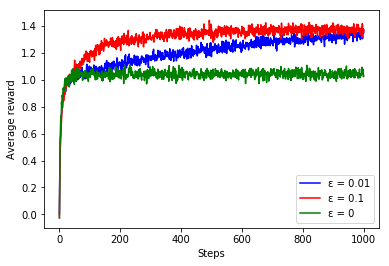

In [18]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE
e_0_01 = run_experiment(10, 0.01, 1000, 2000)
e_0_1 = run_experiment(10, 0.1, 1000, 2000)
e_0 = run_experiment(10, 0, 1000, 2000)
x_axis = range(1, 1001)
plt.plot(x_axis, e_0_01, c='blue', label='ε = 0.01')
plt.plot(x_axis, e_0_1, c='red', label='ε = 0.1')
plt.plot(x_axis, e_0, c='green', label='ε = 0')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE
############################

You should get a result that Greedy behaves well at the beginning, but then surpassed by $\epsilon$-Greedy with $\epsilon=0.1$